# Data analysis

### Required libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [25]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


Attribute Information:
- age: age in years
- sex: 0 = female; 1 = male
- cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (0 = false; 1 = true)
- restecg: resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality; 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- exang: exercise induced angina (0 = no; 1 = yes)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (1: upsloping; 2: flat 3: downsloping)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (0: < 50% diameter narrowing; 1: > 50% diameter narrowing)

### Data information

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  decision  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


### Data type

In [27]:
type(data)

pandas.core.frame.DataFrame

### Data shape

In [28]:
data.shape

(297, 14)

### Descriptive statistics for each column

In [29]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Age histogram

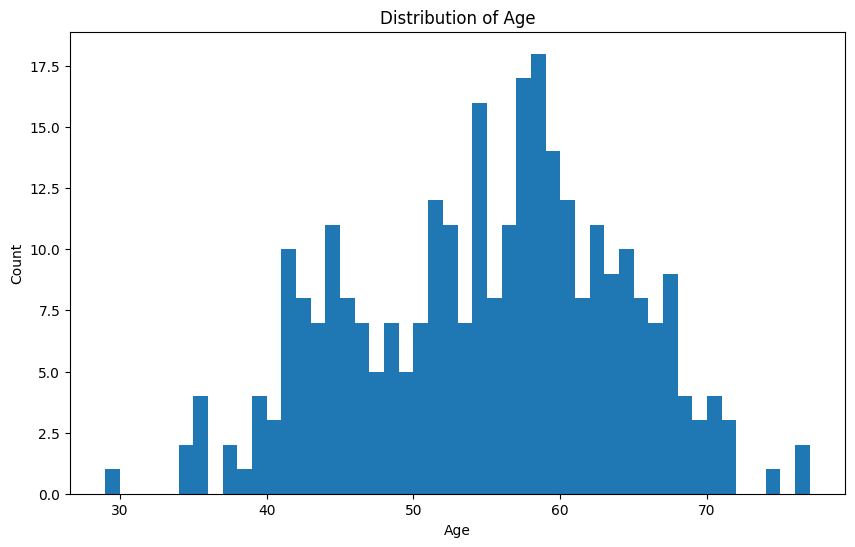

In [38]:
age_range = data['age'].max() - data['age'].min()

plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=int(age_range))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

The vast majority of patients are between the ages of 40 and 70.

### Summary statistics by age

In [31]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_std = data['age'].std()

print("Summary statistics of age:")
print("Mean: ", round(age_mean, 2))
print("Median: ", round(age_median, 2))
print("Standard: ", round(age_std, 2))

Summary statistics of age:
Mean:  54.54
Median:  56.0
Standard:  9.05


### Gender bar chart

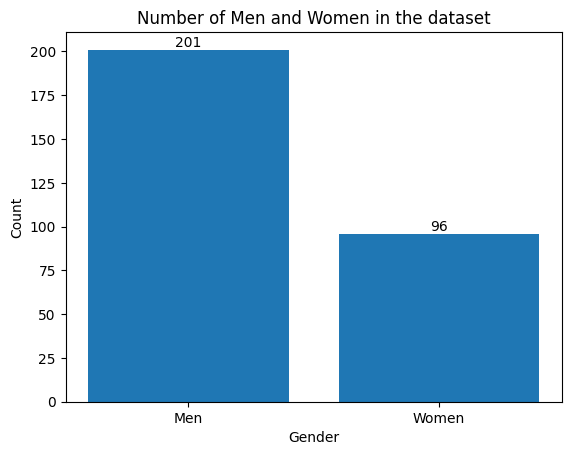

In [32]:
gender_counts = data['sex'].value_counts()  # Number of men and women in the dataset

plt.bar(['Men', 'Women'], gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Men and Women in the dataset')
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [45]:
total_count = len(data)
heart_disease_counts = data[data['decision'] == 1]['sex'].value_counts()

percent_male_with_heart_disease = (heart_disease_counts[1] / gender_counts[1]) * 100
percent_female_with_heart_disease = (heart_disease_counts[0] / gender_counts[0]) * 100

print('Percentage of individuals with heart disease:')
print('Men: ', round(percent_male_with_heart_disease, 2))
print('Women:', round(percent_female_with_heart_disease, 2))

Percentage of individuals with heart disease:
Men:  55.72
Women: 26.04


The analysis shows that the percentage of people with heart disease is higher among men (55.72%) compared to women (26.04%).
This suggests that men may have a higher risk or susceptibility to heart disease compared to women. On the one hand, this highlights the importance of considering gender as a factor in assessing the risk and incidence of heart disease. On the other hand, there is not enough data to assess the credibility of these initial conclusions. The dataset only consists of a nice 300 records.

### Chest paint type charts

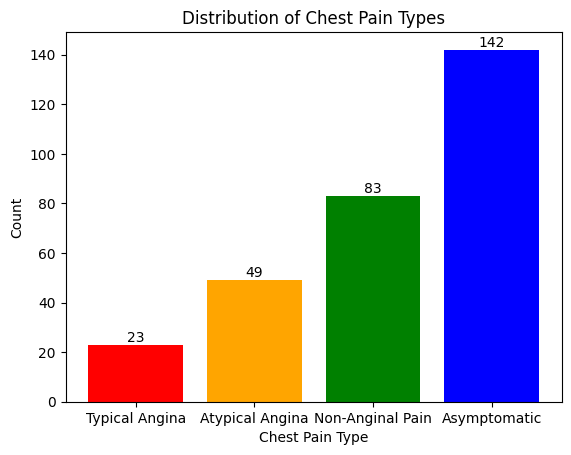

In [34]:
cp_counts = data['cp'].value_counts()
colors = ['blue', 'green', 'orange', 'red']

plt.bar(cp_counts.index, cp_counts.values, color=colors)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.xticks(range(1, 5), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
for i, count in enumerate(cp_counts.values):
    plt.annotate(str(count), xy=(cp_counts.index[i], count), ha='center', va='bottom')
plt.show()

### Relationship between Chest Pain Type and Heart Disease Diagnosis

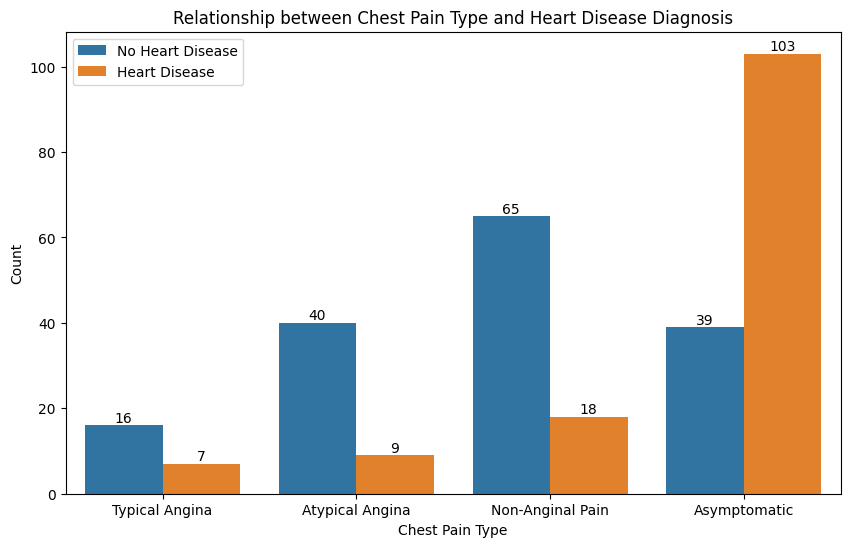

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cp', hue='decision', data=data)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Relationship between Chest Pain Type and Heart Disease Diagnosis')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(range(0, 4), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()

The relationship between chest pain type and heart disease diagnosis reveals that in the group of individuals experiencing "Asymptomatic" (asymptomatic chest pain), there is a significant difference in the number of individuals without heart disease compared to those with heart disease. This appears to be an incredibly high percentage, and there may be various factors that can explain it:
- Asymptomatic individuals may carry hidden risk factors such as hypertension, high cholesterol levels, smoking, or obesity.
- In the analyzed small dataset, there may be a specific subgroup of individuals who are prone to heart disease.
- There could be a statistical error in such a small dataset. Especially when the numbers are small, the results may be more susceptible to random fluctuations.

It is important to emphasize that the analysis based on a small dataset may be limited, and it is not possible to definitively conclude that asymptomatic individuals have such a high risk of heart disease based on these findings.

In [36]:
cp_counts = data.groupby(['cp', 'decision']).size().unstack(fill_value=0)
cp_types = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']

for i, cp_type in enumerate(cp_types):
    count_no_hd = cp_counts.loc[i+1, 0]
    count_hd = cp_counts.loc[i+1, 1]
    count_hd_percent = round((count_hd / (count_hd + count_no_hd))*100, 2)
    print("Count of {}:\n     No Heart Disease = {},\n     Heart Disease = {},\n     Heart Disease in percent = {}%".format(cp_type, count_no_hd, count_hd, count_hd_percent))

Count of Typical Angina:
     No Heart Disease = 16,
     Heart Disease = 7,
     Heart Disease in percent = 30.43%
Count of Atypical Angina:
     No Heart Disease = 40,
     Heart Disease = 9,
     Heart Disease in percent = 18.37%
Count of Non-Anginal Pain:
     No Heart Disease = 65,
     Heart Disease = 18,
     Heart Disease in percent = 21.69%
Count of Asymptomatic:
     No Heart Disease = 39,
     Heart Disease = 103,
     Heart Disease in percent = 72.54%


We can observe that the highest percentage of individuals with heart disease is found in the case of typical chest pain (Typical Angina) - it amounts to 30.43%. This suggests that this type of pain may be more strongly associated with the risk of heart disease compared to other types of pain. However, in data analysis, it is important to exercise caution when drawing definitive conclusions, as these results may be influenced by various factors and limitations of the dataset.

### Boxplot of blood pressure distribution

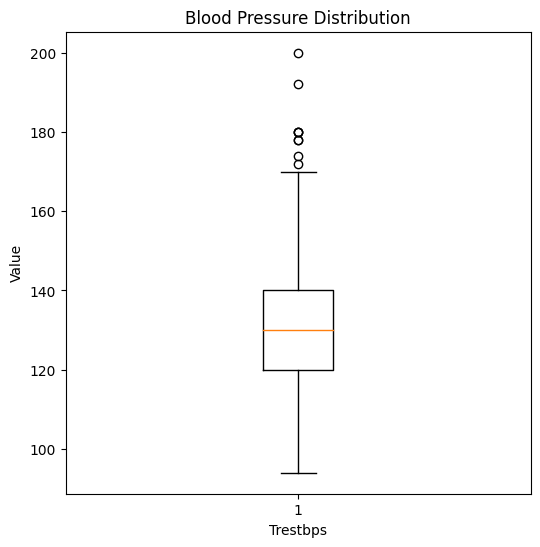

In [46]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['trestbps'])
plt.xlabel('Trestbps')
plt.ylabel('Value')
plt.title('Blood Pressure Distribution')
plt.show()

### Boxplot of cholesterol level distribution

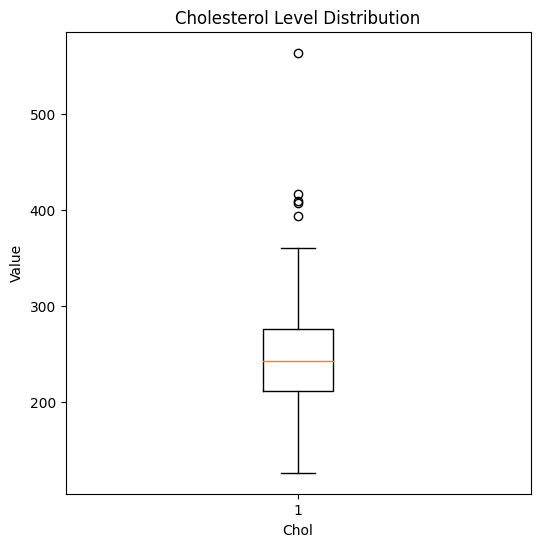

In [47]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['chol'])
plt.xlabel('Chol')
plt.ylabel('Value')
plt.title('Cholesterol Level Distribution')
plt.show()

### Correlation between blood pressure and cholesterol level

In [49]:
correlation = data['trestbps'].corr(data['chol'])
print("Correlation between blood pressure and cholesterol level: {:.2f}".format(correlation))

Correlation between blood pressure and cholesterol level: 0.13


The correlation coefficient between blood pressure (trestbps) and cholesterol level (chol) is 0.13. This indicates a weak positive correlation between these two variables. However, it is important to note that correlation alone does not imply causation. Other factors and variables may also influence the relationship between blood pressure and cholesterol levels.

### Heatmap of correlation

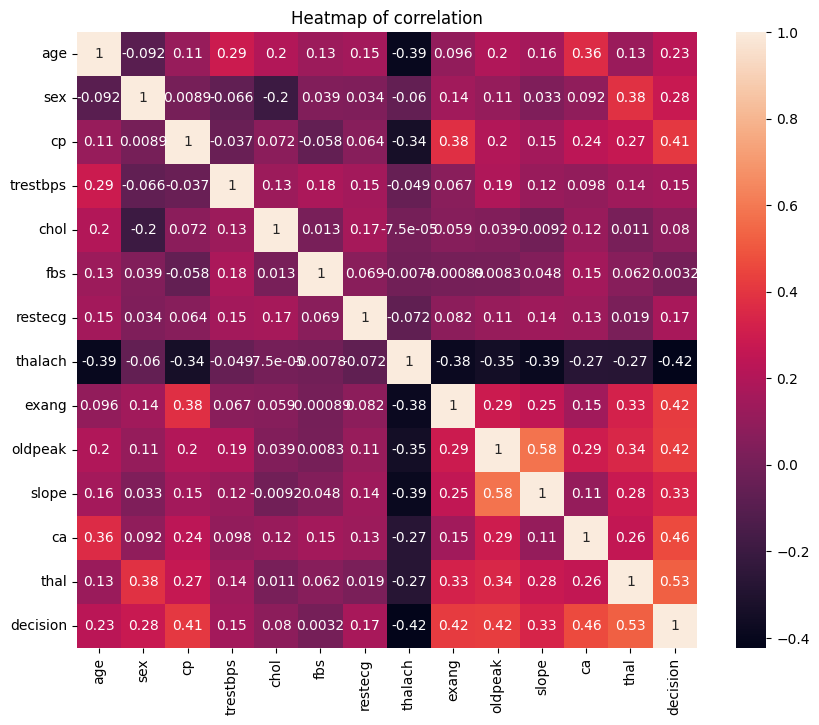

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap of correlation')
plt.show()